<a href="https://colab.research.google.com/github/VeerVikramSingh/Python_Practice/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
%matplotlib inline
data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv",index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
print(data.shape)
print(data.info())
print(data.describe())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB
None
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


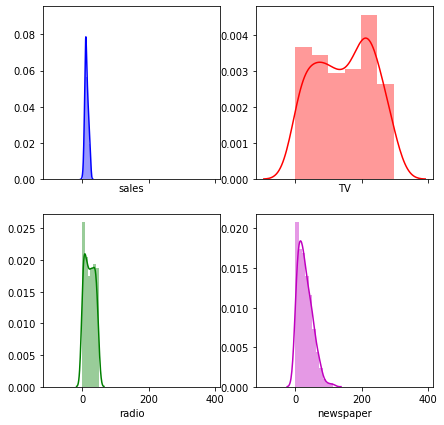

In [3]:
f,axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
 
sns.distplot(data.sales, color="b", ax=axes[0, 0])
sns.distplot(data.TV, color="r", ax=axes[0, 1])

sns.distplot(data.radio, color="g", ax=axes[1, 0])

sns.distplot(data.newspaper, color="m", ax=axes[1, 1])

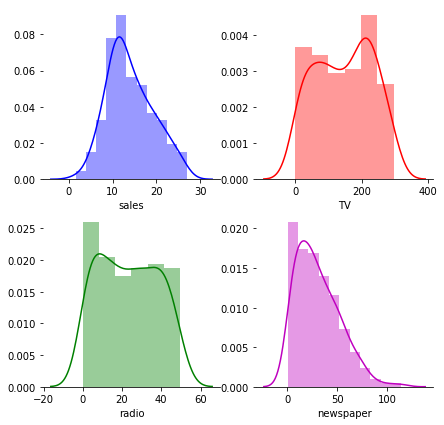

In [4]:
f,axes=plt.subplots(2,2,figsize=(7,7))
sns.despine(left=True)
sns.distplot(data.sales,color="b",ax=axes[0,0])
sns.distplot(data["TV"],color="r",ax=axes[0,1])
sns.distplot(data.radio,color="g",ax=axes[1,0])
sns.distplot(data.newspaper,color="m",ax=axes[1,1])

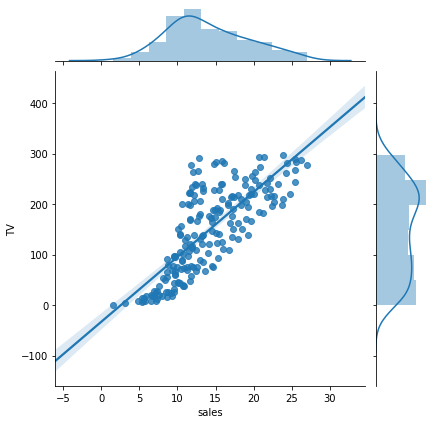

In [5]:
sns.jointplot("sales","TV",data=data,kind="reg")

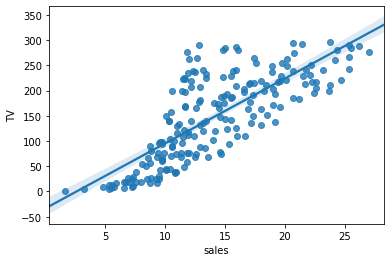

In [6]:
sns.regplot("sales","TV",data=data)

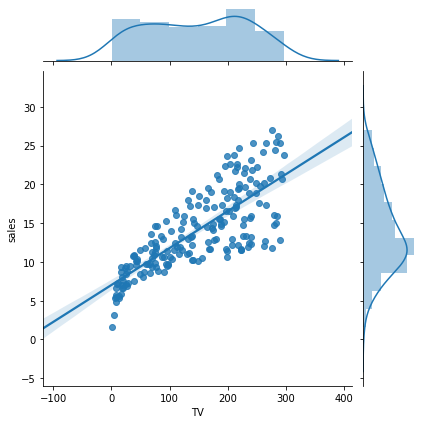

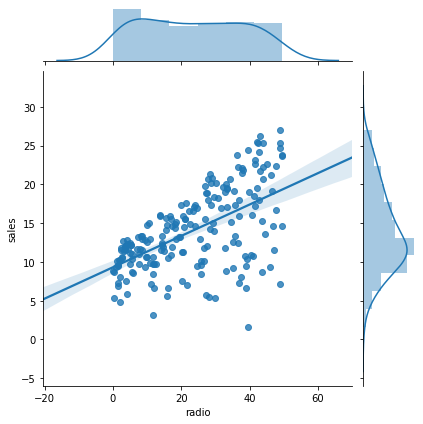

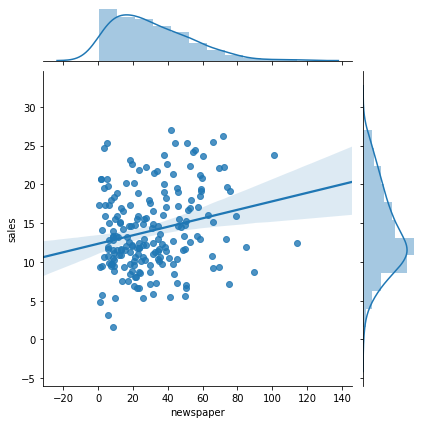

In [7]:
sns.jointplot("TV","sales",data=data,kind="reg")
sns.jointplot("radio","sales",data=data,kind="reg")
sns.jointplot("newspaper","sales",data=data,kind="reg")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


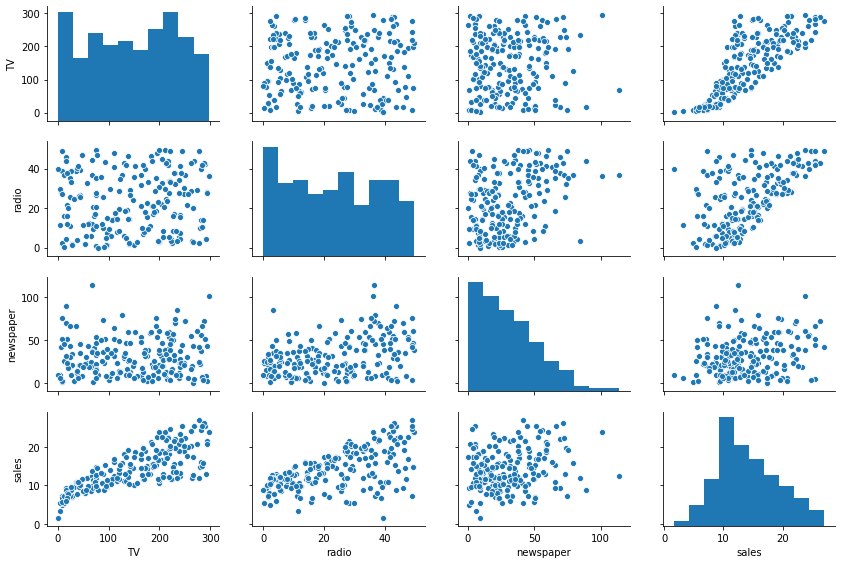

In [8]:
sns.pairplot(data,size=2,aspect=1.5)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


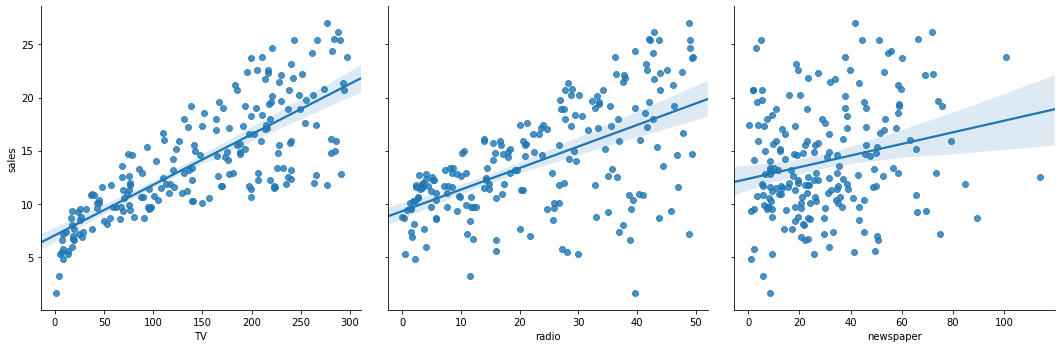

In [9]:
sns.pairplot(data,x_vars=["TV","radio","newspaper"],y_vars="sales",size=5,aspect=1,kind="reg")

In [10]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


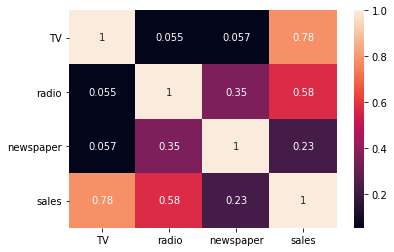

In [11]:
sns.heatmap(data.corr(),annot=True)

In [0]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(data)
data1=scaler.transform(data)

In [13]:
import pandas as pd
data=pd.DataFrame(data1)
data.head()

,0,1,2,3
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [14]:
data.columns=["TV","radio","newspaper","sales"]
data.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [15]:
feat_col=["TV","radio","newspaper"]
x=data[feat_col]
print(x)
print(type(x))
print(x.shape)

           TV     radio  newspaper
0    0.969852  0.981522   1.778945
1   -1.197376  1.082808   0.669579
2   -1.516155  1.528463   1.783549
3    0.052050  1.217855   1.286405
4    0.394182 -0.841614   1.281802
..        ...       ...        ...
195 -1.270941 -1.321031  -0.771217
196 -0.617035 -1.240003  -1.033598
197  0.349810 -0.942899  -1.111852
198  1.594565  1.265121   1.640850
199  0.993206 -0.990165  -1.005979

[200 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [16]:
y=data["sales"]
print(y.head())
print(type(y))
print(y.shape)

0    1.552053
1   -0.696046
2   -0.907406
3    0.860330
4   -0.215683
Name: sales, dtype: float64
<class 'pandas.core.series.Series'>
(200,)


In [0]:
from sklearn.model_selection import train_test_split

def split(x,y):
    return train_test_split(x, y, test_size=0.20, random_state=1)
  

In [18]:
x_train, x_test, y_train, y_test=split(x,y)
print('Train cases as below')
print('X_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (160, 3)
y_train shape:  (160,)

Test cases as below
X_test shape:  (40, 3)
y_test shape:  (40,)


In [0]:
from sklearn.model_selection import train_test_split
def split(x,y):
  return train_test_split(x,y,test_size=0.20,random_state=1)

In [20]:
x_train,y_train,x_test,y_test=split(x,y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [0]:
def linear_reg( x, y, gridsearch = False):
    
    x_train, x_test, y_train, y_test = split(x,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(x_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_x':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(x_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(x_test)                                                   # make predictions on the testing set

        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [22]:
x = data[feat_col]  
y = data.sales
linreg = linear_reg(x,y)
linreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_) 

Intercept: 0.0011620874606385126
Coefficients: [0.77081214 0.50806629 0.01079522]


In [0]:
def linear_reg( x, y, gridsearch = False):
    
    x_train, x_test, y_train, y_test = split(x,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(x_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(x_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(x_test)                                                   # make predictions on the testing set

        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [0]:
feat_col.insert(0,'Intercept')

In [26]:
feat_col.pop(1)

'TV'

In [0]:
feat_col.insert(1,"TV")

In [28]:
feat_col.insert(0,"intercept")
feat_col

['intercept', 'Intercept', 'TV', 'radio', 'newspaper']

In [0]:
coef = linreg.coef_.tolist()

In [30]:
coef

[0.7708121379125106, 0.5080662902756101, 0.010795215187608953]

In [31]:
list(linreg.coef_)

[0.7708121379125106, 0.5080662902756101, 0.010795215187608953]

In [32]:
coef.insert(0, linreg.intercept_)
coef

[0.0011620874606385126,
 0.7708121379125106,
 0.5080662902756101,
 0.010795215187608953]

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline


In [34]:
data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [35]:
data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv",index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [36]:
print(data.shape)
print(data.info())
print(data.describe)

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB
None
<bound method NDFrame.describe of         TV  radio  newspaper  sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>


In [37]:
f,axes=plt.subplots(2,2,figsize=(7,7),sharex=True,shar)
sns.distplot(data["sales"],color="b",ax=axes[0,0])
sns.distplot(data["TV"],color="r",ax=axes[0,1])
sns.distplot(data["radio"],color="g",ax=axes[1,0])
sns.distplot(data["newspaper"],color="m",ax=axes[1,1])

SyntaxError: ignored

In [0]:
print(sns.jointplot("newspaper","sales",data=data,kind="reg"))
print(sns.jointplot("TV","sales",data=data,kind="reg"))
print(sns.jointplot("radio","sales",data=data,kind="reg"))

In [0]:
sns.pairplot(data,size=2,aspect=1.5)

In [0]:
sns.pairplot(data,x_vars=["TV","radio","newspaper"],y_vars=["sales"],size=4,aspect=1.5,kind="reg")

In [0]:
print(data.corr())
print(sns.heatmap(data.corr(),annot=True))

In [0]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler().fit(data)
data1=scalar.transform(data)
data=pd.DataFrame(data1)
data.head()

In [0]:
data.columns=["TV","radio","newspaper","sales"]
data.head()

In [0]:
from sklearn.model_selection import train_test_split
def split(x,y):
  return train_test_split(x,y,test_size=0.20,random_state=1)

In [0]:
x=data[["TV","radio","newspaper"]]
y=data["sales"]
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)
print(x.head())

In [0]:
x_train,x_test,y_train,y_test=split(x,y)

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [0]:
x_train.to_csv("datasump.x_train")
y_test.to_csv("datasump.y_test")

In [0]:
x_train=pd.read_csv("datasump.x_train")
x_train.head()

In [0]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg

In [0]:
x_train.head()

In [0]:
y_train.head()

In [0]:
x_test.shape

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [0]:
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)

In [0]:
RMSE_test = (metrics.mean_squared_error(y_test, y_pred))                          # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

In [0]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression(normalize=True)
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)

In [0]:
rmse=metrics.mean_squared_error(y_test,y_pred)
print(rmse)

In [0]:
data_new=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv",index_col=0)
data_new.head()

In [0]:
x=data[["TV","radio","newspaper"]]
y=data["sales"]
print(x.shape)
print(y.shape)

In [0]:
from sklearn.model_selection import train_test_split
def split(x,y):
  return train_test_split(x,y,test_size=0.20,random_state=1)

In [0]:
x_train,x_test,y_train,y_test=split(x,y)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [0]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression(normalize=False)
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
rmse=metrics.mean_squared_error(y_test,y_pred)
print(rmse)

In [0]:
x=data_new[["TV","radio","newspaper"]]
y=data_new["sales"]
print(x.shape)
print(y.shape)

In [0]:
from sklearn.model_selection import train_test_split
def split(x,y):
  return train_test_split(x,y,test_size=0.20,random_state=1)

In [0]:
x_train,x_test,y_train,y_test=split(x,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [0]:
from sklearn.linear_model import LinearRegression
linreg1=LinearRegression(normalize=True)
linreg1.fit(x_train,y_train)
y_pred=linreg1.predict(x_test)

In [0]:
rmse=metrics.mean_squared_error(y_test,y_pred)
print(rmse)

In [0]:
from sklearn.model_selection import GridSearchCV
linreg2=LinearRegression()
parameters={"normalize":[True,False],"copy_X":[True,False],"fit_intercept":[True,False]}
linreg2=GridSearchCV(linreg2,parameters)
linreg2.fit(x_train,y_train)

In [0]:
linreg2.best_score_

In [0]:
linreg2.best_estimator_

In [0]:
linreg2=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
linreg2.fit(x_train,y_train)
y_pred1=linreg2.predict(x_test)
rmse=metrics.mean_squared_error(y_test,y_pred1)
print(rmse)

In [0]:
excel_df=pd.read_excel('https://github.com/insaid2018/Term-1/blob/master/Data/Casestudy/supermarkets.xlsx?raw=true')
print(excel_df.head())

In [0]:
excel_df=pd.read_excel('https://github.com/insaid2018/Term-1/blob/master/Data/Casestudy/supermarkets.xlsx?raw=true',sheet_name=0)
excel_df.head()

In [0]:
txt_df=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/supermarkets-semi-colons.txt")
txt_df.head()

In [0]:
txt_df=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/supermarkets-semi-colons.txt",sep=";")
txt_df.head()

In [0]:
import pandas as pd
import seaborn as sns
tips=sns.load_dataset("tips")
tips.head()

In [0]:
tips["time"].unique()

In [0]:
tips["time"].head()

In [0]:
tips[(tips["time"]=="Dinner")]["tip"].sum()

In [0]:
tips[(tips["time"]=="Lunch")]["tip"].sum()

In [0]:
tips.groupby(["time","sex","day"])["tip"].agg(["sum","mean","count"])

In [0]:
tips.head()

In [0]:
tips.groupby("time")

In [0]:
tips.head()

In [0]:
people = [['Rick',60, 'O+'], ['Morty', 10, 'O+'], ['Summer', 45,'A-'], ['Beth',18,'B+']]
people_df = pd.DataFrame(people, columns=['Name','Score', 'Blood Group'])
people_df

In [0]:
people_df["Score"]

In [0]:
def double(x):
  if x%6==0:
    return x*2
  else:
    return x

In [0]:
people_df["Score"].apply(double)

In [0]:
people_df["Score"].apply(lambda x:x*2)

In [0]:
print("Intercept:",linreg2.intercept_)
print("coefficents:",linreg2.coef_)

In [0]:
print(linreg.intercept_)
print(linreg.coef_)

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import matrix
%matplotlib inline


In [0]:
data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv",index_col=0)

In [0]:
data.head()

In [0]:
print(sns.distplot(data["TV"],color="g"))


In [0]:

print(sns.distplot(data["sales"]))

In [0]:
print(data.shape)
print(data.info())
print(data.describe)

In [0]:
f,axes=plt.subplots(2,2,figsize=(7,7),sharex=True)
sns.despine(left=True)
sns.distplot(data["TV"],color="g",ax=axes[0,0])
sns.distplot(data["radio"],color="b",ax=axes[0,1])
sns.distplot(data["newspaper"],color="r",ax=axes[1,0])
sns.distplot(data["sales"],ax=axes[1,1])

In [0]:
print(sns.jointplot("TV","sales",data=data,kind="reg"))
print(sns.jointplot("radio","sales",data=data,kind="reg"))
print(sns.jointplot("newspaper","sales",data=data,kind="reg"))

In [0]:
sns.pairplot(data,size=2.5,aspect=1.5)

In [0]:
sns.pairplot(data=data,x_vars=["TV","radio","newspaper"],y_vars=["sales"],size=5,aspect=1.5,kind="reg")

In [0]:
data.corr()

In [0]:
sns.heatmap(data.corr(),annot=True)

In [0]:
data.head()

In [0]:
data.head()

In [0]:
import sklearn
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler().fit(data)
data1=scalar.transform(data)

In [0]:
data=pd.DataFrame(data1)
data.head()

In [0]:
data.columns=["TV","radio","newspaper","sales"]
data.head()

In [0]:
x=data[["TV","radio","sales"]]
x.head()

In [0]:
y=data["sales"]
y.head()

In [0]:
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

In [0]:
from sklearn.model_selection import  train_test_split
def split(x,y):
  return train_test_split(x,y,test_size=0.20,random_state=1)

In [0]:
x_train,x_test,y_train,y_test=split(x,y)

In [0]:
print(x_train.head())
print(y_train.head())
print(x_train.shape)
print(x_test.shape)

In [0]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
RMSE=metrics.mean_squared_error(y_test,y_pred)
print(RMSE)


In [0]:
data.head()

In [0]:
x_train.to_csv("datasump_xtrain.csv")
y_train.to_csv("datasump_ytrain.csv")

In [0]:
x_train=pd.read_csv("datasump_xtrain.csv")
x_train.head()

In [0]:
data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv",index_col=0)
data.head()

In [0]:
x=data[["TV","radio","newspaper"]]
y=data["sales"]
x.head

In [0]:
from sklearn.model_selection import  train_test_split
def split(x,y):
  return train_test_split(x,y,test_size=0.20,random_state=1)

In [0]:
x_train,x_test,y_train,y_test=split(x,y)
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
RMSE=metrics.mean_squared_error(y_test,y_pred)
print(RMSE)

In [0]:
data.head()

In [0]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression(normalize=True)
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
rmse=metrics.mean_squared_error(y_test,y_pred)
print(rmse)

In [0]:
data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv",index_col=0)
data.head()

In [0]:
import sklearn

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(data)
data1=scaler.transform(data)
data2=pd.DataFrame(data1)
data2.head()

,0,1,2,3
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [58]:
data2.columns=["TV","radio","newspaper","sales"]
data2.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [0]:
X=data2[["TV","radio","newspaper"]]
Y=data2["sales"]

In [0]:
from sklearn.model_selection import train_test_split
def split(X,Y):
  return train_test_split(X,Y,test_size=0.20,random_state=1)

In [0]:
X_train,X_test,Y_train,Y_test=split(X,Y)

In [64]:
from sklearn.linear_model import LinearRegression
linreg1=LinearRegression()
linreg1.fit(X_train,Y_train)
Y_pred=linreg1.predict(X_test)
RMSE=metrics.mean_squared_error(Y_test,Y_pred)
print(RMSE.round(4))

0.0735


In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {'normalize':[True,False], 'copy_X':[True, False], 'fit_intercept':[True,False]}
linreg=LinearRegression()
linreg=GridSearchCV(linreg,parameters)

In [66]:
linreg

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [67]:
linreg.estimator

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
linreg.score

<bound method BaseSearchCV.score of GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

In [69]:
linreg.best_score_

AttributeError: ignored

In [70]:
linreg.estimator

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
linreg=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linreg.fit(X_train,Y_train)
Y_Pred=linreg.predict(X_test)
RMSE=metrics.mean_squared_error(Y_test,Y_pred)
print(RMSE)


0.07353999839228295


In [72]:
linreg.coef_

array([0.77081214, 0.50806629, 0.01079522])

In [73]:
linreg.intercept_

0.0011620874606385126

In [0]:
X

In [74]:
X.insert(0,"Intercept")

TypeError: ignored

In [0]:
feat_col=["TV","radio","newspaper"]

In [76]:
feat_col

['TV', 'radio', 'newspaper']

In [0]:
feat_col.insert(0,"Intercept")

In [78]:
feat_col

['Intercept', 'TV', 'radio', 'newspaper']

In [0]:
coef=linreg.coef_.tolist()
coef.insert(0,linreg.intercept_)

In [80]:
coef

[0.0011620874606385126,
 0.7708121379125106,
 0.5080662902756101,
 0.010795215187608953]

In [81]:
eq1=zip(feat_col,coef)
for c1,c2 in eq1:
  print(c1,c2)

Intercept 0.0011620874606385126
TV 0.7708121379125106
radio 0.5080662902756101
newspaper 0.010795215187608953


In [82]:
feat_col=["TV","radio","newspaper"]
feat_col

['TV', 'radio', 'newspaper']

In [0]:
feat_col.insert(0,"Intercept")
coef=linreg.coef_.tolist()
coef.insert(0,linreg.intercept_)

In [84]:
for (c1,c2) in zip(feat_col,coef):
  print(c1,c2)

Intercept 0.0011620874606385126
TV 0.7708121379125106
radio 0.5080662902756101
newspaper 0.010795215187608953


In [0]:
Y_train_pred=linreg.predict(X_train)
Y_test_pred=linreg.predict(X_test)

MAE,MSE,RMSE..

In [86]:
MAE_Train=metrics.mean_absolute_error(Y_train,Y_train_pred)
MAE_test=metrics.mean_absolute_error(Y_test,Y_test_pred)
print(MAE_Train)
print(MAE_test)

0.2553322418777194
0.19987243199696367


In [87]:
MSE_Train=metrics.mean_squared_error(Y_train,Y_train_pred)
MSE_Test=metrics.mean_squared_error(Y_test,Y_test_pred)
print(MSE_Train)
print(MSE_Test)

0.11138075570325356
0.07353999839228295


In [88]:
RMSE_Train=np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred))
RMSE_Test=np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred))
print(RMSE_Train)
print(RMSE_Test)

0.33373755512865727
0.27118259234744946


In [0]:
x=data[["TV","radio"]]
y=data["sales"]
x_train,x_test,y_train,y_test=split(x,y)

In [90]:
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_test=linreg.predict(x_test)

In [92]:
rmse=metrics.mean_squared_error(y_test,y_pred_test)
print(rmse)

1.9552218850113199


In [93]:
linreg.intercept_

2.947515036029003

In [94]:
linreg.coef_

array([0.04686997, 0.1800065 ])

In [0]:
y_train_pred=linreg.predict(x_train)
y_test_pred=linreg.predict(x_test)

In [95]:
RMSE_TRAIN=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
RMSE_TEST=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print(RMSE_TRAIN)
print(RMSE_TEST)

1.7376069405545282
1.398292489077775


In [96]:
np.random.seed(123456)                                                # set a seed for reproducibility
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)                         # assign roughly one third of observations to each group
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,radio,newspaper,sales,Area
1,230.1,37.8,69.2,22.1,rural
2,44.5,39.3,45.1,10.4,urban
3,17.2,45.9,69.3,9.3,rural
4,151.5,41.3,58.5,18.5,urban
5,180.8,10.8,58.4,12.9,suburban
